Getting Started

In [1]:
import torch

In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()

12

In [4]:
x.shape

torch.Size([12])

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
# Specifying every shape component is redundant
# Use "-1" for what should be automatically calculated
x.reshape(3, -1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [7]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(5, 8)

tensor([[ 1.2346, -0.0648, -1.6934, -2.2689,  0.6261, -0.5193, -2.0376, -0.3555],
        [-0.7778,  2.0049,  0.9114, -0.6384,  0.0355, -0.0933, -0.3732,  1.6621],
        [ 0.0770, -1.4110, -0.3876,  0.9295,  0.7572, -0.4257, -0.8396, -0.8529],
        [-1.5281, -0.0161, -1.9246, -1.2183, -2.0362,  1.2104, -1.3513, -1.0957],
        [ 1.2586,  0.6186, -0.1688,  0.8780,  0.3190,  1.0730,  0.3339, -1.7046]])

In [10]:
t1 = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
t1

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [11]:
t1.shape

torch.Size([3, 4])

Indexing and Slicing

In [12]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [13]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [14]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

Automatic Differentiation

In [16]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [18]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [19]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [20]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

Probabilities

In [39]:
%matplotlib inline
import random
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [42]:
num_tosses = 1_000_000
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [500100, 499900]


In [46]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([50., 50.])

In [54]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4700, 0.5300])

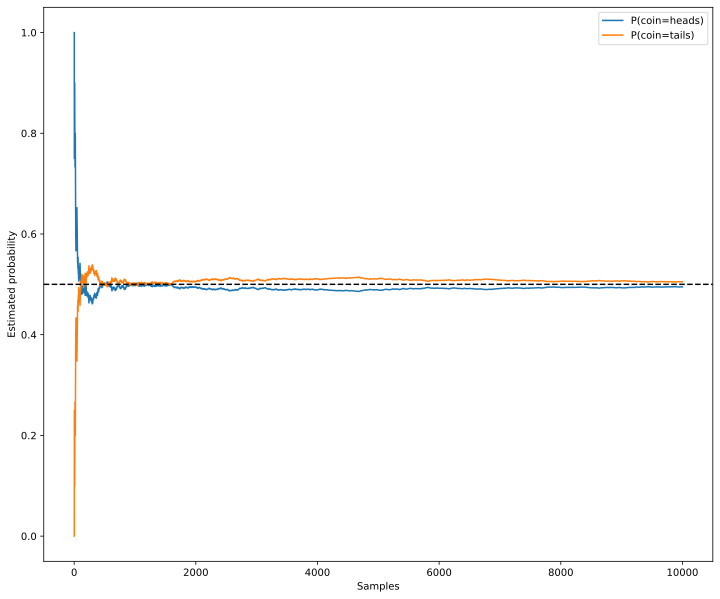

In [64]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((12, 10))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();